In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [3]:
dataset = pd.read_csv('machines.csv', index_col=0)
dataset.columns = ['Vendor_name', 'model', 'MCYT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

### 4.a
Imbalance data means that out of all the points in the data distribution, we have more points of a specific class than points of other classes. this creates a bayes in the model. As the model sees and learns more of one class, it tries to predict more of that class by default. In fact, for each entry, model tends to predict that class.

### 4.b

In [5]:
dataset.loc[dataset['PRP'] <= 300, 'labeled_PRP'] = 'A'
dataset.loc[dataset['PRP'] > 300, 'labeled_PRP'] = 'B'

### 4.c

A    191
B     17
Name: labeled_PRP, dtype: int64

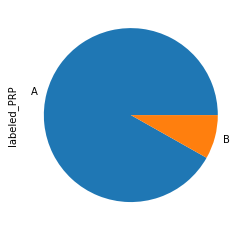

In [15]:
dataset['labeled_PRP'].value_counts().plot.pie().get_figure().set_facecolor('w')
dataset['labeled_PRP'].value_counts()

As we can see, we have far more A values than B values. Thus, this data is imbalanced

### 4.d Up Sampling

In [23]:
up_sampled_B = resample(dataset[dataset['labeled_PRP'] == 'B'], n_samples=(dataset['labeled_PRP'] == 'A').sum())
df_upSampled = pd.concat((
    up_sampled_B,
    dataset[dataset['labeled_PRP'] == 'A']
)).sample(frac=1).reset_index(drop=True)

This method repeats the data that we have of the classes that their data counts are lower than the class with maximum data points so that every class have the same number of data points as the class with the maximum number of data points

###  4.e Down Sampling

In [25]:
up_sampled_A = resample(dataset[dataset['labeled_PRP'] == 'A'], n_samples=(dataset['labeled_PRP'] == 'B').sum())
df_downSampled = pd.concat((
    up_sampled_A,
    dataset[dataset['labeled_PRP'] == 'B']
)).sample(frac=1).reset_index(drop=True)

This method randomly samples the data that we have of the classes that their data counts are higher than the class with minimum data points so that every class have the same number of data points as the class with the minimum number of data points